# Import libraries

In [ ]:
import networkx as nx
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import networkx.algorithms.community as nx_comm
from sklearn.metrics.cluster import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score,davies_bouldin_score, silhouette_score, rand_score, adjusted_rand_score, homogeneity_score, completeness_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

from sklearn.cluster import KMeans

import copy

Print community metrics


In [ ]:
def print_metrics_community(method_name, G, communities):
    modularity_method = nx_comm.modularity(G, communities)
    coverage_method = nx_comm.coverage(G, communities)
    performance_method = nx_comm.performance(G, communities)
    print('---------')
    print(f'Metrics for communities with {method_name}')
    print(f'Modularity ({method_name}): {modularity_method:.4f}')
    print(f'Coverage ({method_name}: {coverage_method:.4f}')
    print(f'Performance ({method_name}: {performance_method:.4f}')
    return modularity_method

def print_metrics_cluster(method_name, ground_truth, labels):
    ground_truth = np.array(ground_truth)
    labels = np.array(labels)
    mi_score_method = mutual_info_score(ground_truth, labels)
    nmi_score_method = normalized_mutual_info_score(ground_truth, labels)
    ami_score_method = adjusted_mutual_info_score(ground_truth, labels)
    davies_bouldin_score_method = davies_bouldin_score(ground_truth.reshape(-1, 1), labels.ravel())
    silhouette_score_method = silhouette_score(ground_truth.reshape(-1, 1), labels.ravel())
    rand_score_method = rand_score(ground_truth, labels)
    adjusted_rand_score_method = adjusted_rand_score(ground_truth, labels)
    hom_score_method = homogeneity_score(ground_truth, labels)
    com_score_method = completeness_score(ground_truth, labels)
    print('---------')
    print(f'Metrics for clustering with {method_name}')
    print(f'Mutual Information (MI) score ({method_name}): {mi_score_method:.4f}')
    print(f'Normalized Mutual Information (NMI) score ({method_name}): {nmi_score_method:.4f}')
    print(f'Adjusted Mutual Information (AMI) score ({method_name}): {ami_score_method:.4f}')
    print(f'Davies Bouldin (DB) score ({method_name}): {davies_bouldin_score_method:.4f}')
    print(f'Silhouette score ({method_name}): {silhouette_score_method:.4f}')
    print(f'Rand score ({method_name}): {rand_score_method:.4f}')
    print(f'Adjusted Rand score ({method_name}): {adjusted_rand_score_method:.4f}')
    print(f'Homogeneity score ({method_name}): {hom_score_method:.4f}')
    print(f'Completeness score ({method_name}): {com_score_method:.4f}')
    return silhouette_score_method

    

# Φόρτωση γραφήματος


In [ ]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
G.nodes()

In [ ]:
n = nx.number_of_nodes(G)
n

In [ ]:
Mr_Hi = 0
John_A = 33

club_labels = nx.get_node_attributes(G,'club')

In [ ]:
circ_pos = nx.circular_layout(G)
nx.draw(G,circ_pos)
# highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(G, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [ ]:
# density
print("Network density:", nx.density(G))
# average degree
degree = G.degree()
degree_list = []
for (_,d) in degree:
    degree_list.append(d)
av_degree = sum(degree_list) / len(degree_list)
print('The average degree is ' + str(av_degree))

In [ ]:
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Nodes by degree:")
for d in sorted_degree:
    print(d)

In [ ]:
club_labels = nx.get_node_attributes(G,'club')

In [ ]:
node_label = {key:club_labels[key] for key in club_labels}
node_label

In [ ]:
labels = list(node_label.values())
le = preprocessing.LabelEncoder()
labels = list(le.fit_transform(labels))
labels

# Community Detection - Louvain

Σκοπός είναι να βρεθούν κοινότητες μεταξύ των κόμβων του γράφου.

In [ ]:
def plot_community(G, partition):
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_color='w')
    plt.show()
    plt.close()

In [ ]:
modularity, silhouette = dict(), dict()

In [ ]:
import community.community_louvain as community_louvain

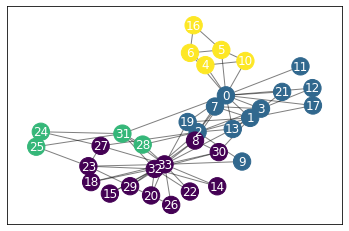

In [ ]:
partition = community_louvain.best_partition(G, resolution=1., random_state=0)
num_of_clusters = max(partition.values()) + 1
plot_community(G, partition)

In [ ]:
clusters_louv = [[]  for _ in range(num_of_clusters)]
for v in partition:
    c = partition[v]
    clusters_louv[c].append(v)

louvain_labels = [c for c in partition.values()]  

In [ ]:
m = print_metrics_community('Louvain', G, clusters_louv)
s = print_metrics_cluster('Louvain', labels, louvain_labels)
modularity['Louvain'] = m
silhouette['Louvain'] = s

---------
Metrics for communities with Louvain
Modularity (Louvain): 0.4156
Coverage (Louvain: 0.7564
Performance (Louvain: 0.7861
---------
Metrics for clustering with Louvain
Mutual Information (MI) score (Louvain): 0.4882
Normalized Mutual Information (NMI) score (Louvain): 0.4977
Adjusted Mutual Information (AMI) score (Louvain): 0.4704
Davies Bouldin (DB) score (Louvain): 1.8397
Silhouette score (Louvain): -0.4706
Rand score (Louvain): 0.7184
Adjusted Rand score (Louvain): 0.4293
Homogeneity score (Louvain): 0.7044
Completeness score (Louvain): 0.3848


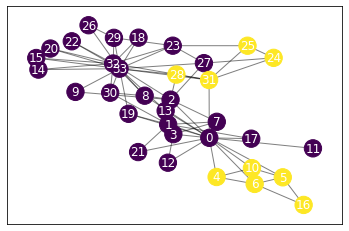

---------
Metrics for communities with Louvain
Modularity (Louvain): 0.1774
Coverage (Louvain: 0.8590
Performance (Louvain: 0.5009
---------
Metrics for clustering with Louvain
Mutual Information (MI) score (Louvain): 0.2322
Normalized Mutual Information (NMI) score (Louvain): 0.3654
Adjusted Mutual Information (AMI) score (Louvain): 0.3493
Davies Bouldin (DB) score (Louvain): 0.6400
Silhouette score (Louvain): 0.3627
Rand score (Louvain): 0.6292
Adjusted Rand score (Louvain): 0.2629
Homogeneity score (Louvain): 0.3350
Completeness score (Louvain): 0.4018


In [ ]:
combined1, combined2 = clusters_louv[0] + clusters_louv[1], clusters_louv[2] + clusters_louv[3] 
combined_community = [combined1, combined2]

partition = dict()
for i, community in enumerate(combined_community):
    for node in community:
        partition[node] = i
        
plot_community(G, partition)
num_clusters = 2

clusters_louv = [[]  for _ in range(num_of_clusters)]
for v in partition:
    c = partition[v]
    clusters_louv[c].append(v)

louvain_labels = [c for c in partition.values()] 

m = print_metrics_community('Louvain', G, clusters_louv)
s = print_metrics_cluster('Louvain', labels, louvain_labels)
modularity['Louvainv2'] = m
silhouette['Louvainv2'] = s

# Community Detection - Girvan Newman

In [ ]:
import operator

In [ ]:
number_of_communities = 2
num_of_cc = nx.number_connected_components(G)
while num_of_cc < number_of_communities:
    B = nx.edge_betweenness_centrality(G)
    edge = max(B.items(), key=operator.itemgetter(1))[0]
    G.remove_edge(edge[0], edge[1])
    print(f'Removed edge: {edge}')
    num_of_cc = nx.number_connected_components(G)

Removed edge: (0, 31)
Removed edge: (0, 2)
Removed edge: (0, 8)
Removed edge: (13, 33)
Removed edge: (19, 33)
Removed edge: (2, 32)
Removed edge: (1, 30)
Removed edge: (1, 2)
Removed edge: (2, 3)
Removed edge: (2, 7)
Removed edge: (2, 13)


In [ ]:
# Colors for the nodes of each community
palette = ['yellow', 'cyan', 'lightgreen', 'lightgrey']
node_color = [None] * len(G)
cc = nx.connected_components(G)
for i,c in enumerate(cc):
    for node in c:
        node_color[node] = palette[i]

In [ ]:
# Convert cc to list of communities
cc = nx.connected_components(G)
partition = list()
for c in cc:
    partition.append(list(c))

In [ ]:
# Create the original graph again
G = nx.karate_club_graph()

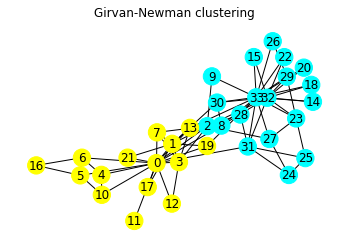

In [ ]:
# Draw the graph using the colors 
plt.title('Girvan-Newman clustering')
nx.draw(G, with_labels=True, node_color=node_color)
plt.show()

In [ ]:
# Metrics for the clustering
import networkx.algorithms.community as nx_comm

modularity = nx_comm.modularity(G, partition)
print(f'Modularity (Girvan-Newman): {modularity}')

coverage = nx_comm.coverage(G, partition)
print(f'Coverage (Girvan-Newman): {coverage}')

performance = nx_comm.performance(G, partition)
print(f'Performance (Girvan-Newman): {performance}')

Modularity (Girvan-Newman): 0.3599605522682445
Coverage (Girvan-Newman): 0.8717948717948718
Performance (Girvan-Newman): 0.6114081996434938


In [ ]:
m = print_metrics_community('Girvan-Newman', G, partition)
s = print_metrics_cluster('Girvan-Newman', labels, node_color)
modularity['Girvan-Newman'] = m
silhouette['Girvan-Newman'] = s

---------
Metrics for communities with Girvan-Newman
Modularity (Girvan-Newman): 0.3600
Coverage (Girvan-Newman: 0.8718
Performance (Girvan-Newman: 0.6114
---------
Metrics for clustering with Girvan-Newman
Mutual Information (MI) score (Girvan-Newman): 0.5051
Normalized Mutual Information (NMI) score (Girvan-Newman): 0.7324
Adjusted Mutual Information (AMI) score (Girvan-Newman): 0.7263
Davies Bouldin (DB) score (Girvan-Newman): 0.2105
Silhouette score (Girvan-Newman): 0.8268
Rand score (Girvan-Newman): 0.8859
Adjusted Rand score (Girvan-Newman): 0.7717
Homogeneity score (Girvan-Newman): 0.7287
Completeness score (Girvan-Newman): 0.7361


# Features
 
Τα μέλη του δικτύου χωρίζονται γύρω από τον κόμβο 0 (Mr. Hi) και τον κόμβο 33 (Officer). Μαθηματικά, η δομή του δικτύου μπορεί εύκολα να αναπραστεί ως ο πίνακας γειτνίασης (Adjacency Matrix). 
 
Ο γράφος που μελετούμε είναι μη κατευθυνόμενος και χωρίς βάρη (undirected & unweighted). Αυτό σημαίνει ότι οι ακμές δεν σχετίζονται με την κατεύθυνση (Α συμμετρικός) και οι ακμές λαμβάνουν binary τιμή.

In [ ]:
g_self_loops = copy.deepcopy(G)
self_loops = [(i, i) for i in list(G.nodes())]
g_self_loops.add_edges_from(self_loops)

In [ ]:
A = nx.convert_matrix.to_numpy_matrix(G, nodelist=None, weight=None)
A = np.asarray(A)

A_self_loops = nx.convert_matrix.to_numpy_matrix(g_self_loops, nodelist=None, weight=None)
A_self_loops = np.asarray(A_self_loops)

In [ ]:
A

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
A_self_loops

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(A)
y_pred = kmeans.predict(A)

In [ ]:
clusters = [[] for _ in range(len(np.unique(y_pred)))]
for i, label in enumerate(y_pred):
    clusters[label].append(i)

In [ ]:
m = print_metrics_community('KMeans', G, clusters)
s = print_metrics_cluster('KMeans', labels, y_pred)
modularity['Kmeans'] = m
silhouette['Kmeans'] = s

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(A_self_loops)
y_pred = kmeans.predict(A_self_loops)
clusters = [[] for _ in range(len(np.unique(y_pred)))]
for i, label in enumerate(y_pred):
    clusters[label].append(i)
m = print_metrics_community('KMeans_with_self', g_self_loops, clusters)
s = print_metrics_cluster('KMeans_with_self', labels, y_pred)
modularity['Kmeans_self'] = m
silhouette['Kmeans_self'] = s

In [ ]:
mod_method = list(modularity.keys())
mod_res = list(modularity.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(mod_method, mod_res, color ='maroon',
        width = 0.4)
 
plt.xlabel("")
plt.ylabel("Modularity")
plt.show()

In [ ]:
silhouette_method = list(silhouette.keys())
silhouette_res = list(silhouette.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(silhouette_method, silhouette_res, color ='maroon',
        width = 0.4)

plt.ylim(bottom=0.)
plt.xlabel("")
plt.ylabel("Silhouette")
plt.show()

In [ ]:
n_clusters = [i for i in range(2, 9)]
silhouette_scores = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(A_self_loops)
    y_pred = kmeans.predict(A_self_loops)
    clusters = [[] for _ in range(len(np.unique(y_pred)))]
    for i, label in enumerate(y_pred):
        clusters[label].append(i)
    s = print_metrics_cluster('k='+str(n), labels, y_pred)
    silhouette_scores.append(s)

plt.plot(silhouette_scores)
plt.xticks(np.arange(len(silhouette_scores)), np.arange(2, len(silhouette_scores)+2))
plt.show()